<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 9</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Some example joint distribution

In [2]:
dr = 2**-8
xs = np.arange(-8,8.001,dr)
ys = np.arange(-8,8.001,dr)
xx,yy = np.meshgrid(xs,ys)

In [3]:
def func(x,y):
    r = np.exp(-(x**2+y**2)/4-(x-2*np.sin(y))**2/.5)
    r += np.exp(-((x+4)**2+(y-1.57)**2)*2)/2
    r = r**0.25
    return r
zz = func(xx,yy)
zz /= (dr*dr*zz.sum()) # normalize

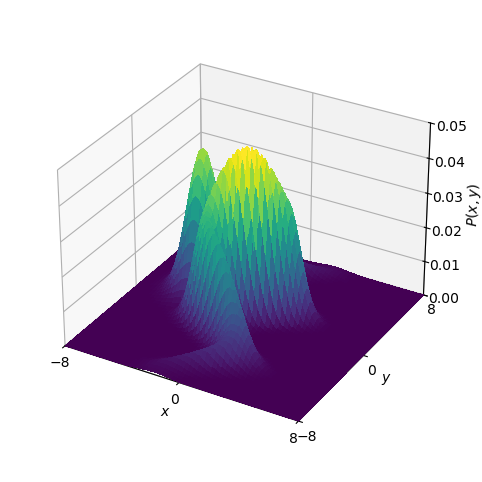

In [4]:
f = plt.figure(figsize=(8,6))
a = f.add_subplot(projection='3d')
a.plot_surface(
    xx,yy,zz,cmap='viridis',rstride=64,cstride=64,
    linewidth=0,antialiased=False,shade=True
)
a.set_zlim(0,0.05)
a.set_xlim(-8,8)
a.set_ylim(-8,8)
a.set_xticks([-8,0,8])
a.set_yticks([-8,0,8])
for t in a.get_xaxis().get_major_ticks(): t.set_pad(-2)
for t in a.get_yaxis().get_major_ticks(): t.set_pad(-2)
for t in a.get_zaxis().get_major_ticks(): t.set_pad(2)
a.set_xlabel('$x$',labelpad=-4)
a.set_ylabel('$y$',labelpad=-4)
a.set_zlabel('$P(x,y)$',labelpad=2)
a.set_box_aspect(aspect=None, zoom=0.9) 
plt.show()

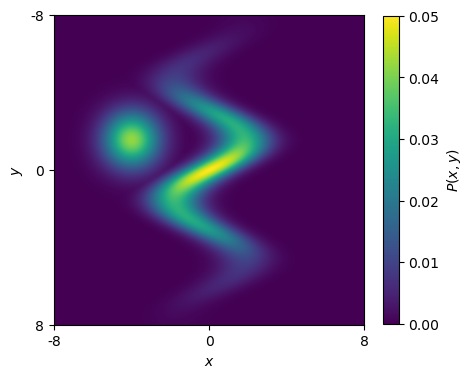

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(zz[::-1])
plt.xticks([0,len(zz)/2,len(zz)-1],[-8,0,8])
plt.yticks([0,len(zz)/2,len(zz)-1],[-8,0,8])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.clim(0,0.05)
plt.colorbar(shrink=0.8).set_label('$P(x,y)$')
plt.show()

## Sampling from the distribution

In [6]:
rng = np.random.default_rng(1234)
ps = np.array([p for p in rng.uniform(-10,10,size=(10000,2)) if rng.uniform()<func(*p)])
sx,sy = ps.T

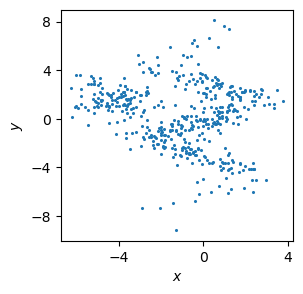

In [7]:
plt.figure(figsize=(3,3))
plt.scatter(sx,sy,s=1.5)
xlm = plt.gca().get_xlim()
ylm = plt.gca().get_ylim()
plt.xticks([-4,0,4])
plt.yticks([-8,-4,0,4,8])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(xlm)
plt.ylim(ylm)
plt.show()

## Marginal probability

In [8]:
# Marginal probability
px = zz.sum(axis=0)*dr
py = zz.sum(axis=1)*dr

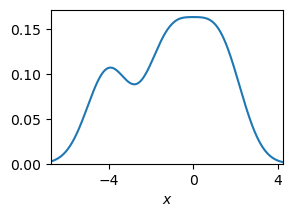

In [9]:
plt.figure(figsize=(3,2))
plt.plot(xs,px)
plt.xlim(xlm)
plt.xticks([-4,0,4])
plt.xlabel('$x$')
plt.ylim(0,)
plt.show()

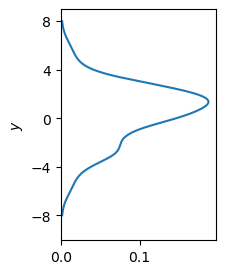

In [10]:
plt.figure(figsize=(2,3))
plt.plot(py,ys)
plt.yticks([-8,-4,0,4,8])
plt.ylabel('$y$')
plt.ylim(ylm)
plt.xlim(0,)
plt.show()

## Conditional probability

In [11]:
# Conditional probability
px1 = (lambda i:zz[i,:]/py[i])(np.where(ys==1)[0][0])

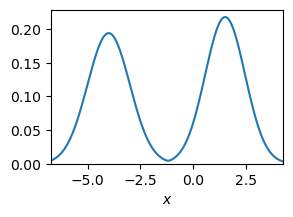

In [12]:
plt.figure(figsize=(3,2))
plt.plot(xs,px1)
plt.xlabel('$x$')
plt.xlim(xlm)
plt.ylim(0,)
plt.show()

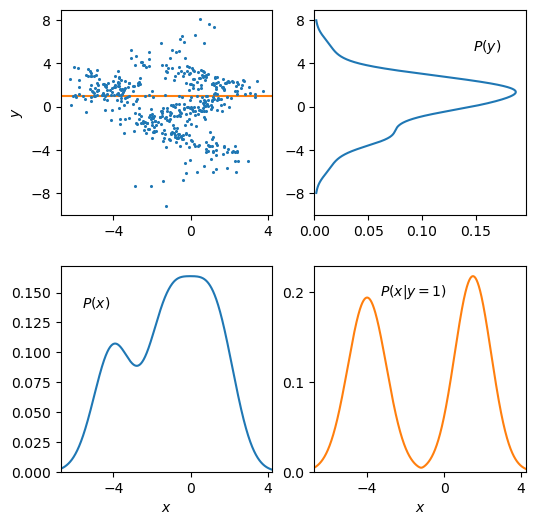

In [13]:
f,aa = plt.subplots(2,2,figsize=(6,6))
f.subplots_adjust(wspace=0.2,hspace=0.25)
a = aa[0,0]
a.scatter(sx,sy,s=1.5)
xr,yr = a.get_xlim(),a.get_ylim()
a.set_xticks([-4,0,4])
a.set_yticks([-8,-4,0,4,8])
a.hlines(1,*xr,color='C1',zorder=-1)
a.set_ylabel('$y$')
a.set_xlim(xr)
a.set_ylim(yr)

a = aa[1,0]
a.plot(xs,px)
a.set_xlim(xlm)
a.set_xticks([-4,0,4])
a.set_xlabel('$x$')
a.set_ylim(0,)
a.text(0.1,0.8,'$P(x)$',transform=a.transAxes)

a = aa[0,1]
a.plot(py,ys)
a.set_ylim(ylm)
a.set_yticks([-8,-4,0,4,8])
a.set_xlim(0,)
a.text(0.75,0.8,'$P(y)$',transform=a.transAxes)

a = aa[1,1]
a.plot(xs,px1,color='C1')
a.set_xticks([-4,0,4])
a.set_yticks([0,0.1,0.2])#,[0,0.1,0.2])
a.set_xlabel('$x$')
a.set_xlim(xlm)
a.set_ylim(0,)
a.text(0.47,0.86,'$P(x|y=1)$',ha='center',transform=a.transAxes)
plt.show()

# Lazy pollster

In [14]:
population = 20
ss = np.arange(population+1) # Consider a population of 20
ps0 = np.ones_like(ss)/len(ss) # Uniform prior probability

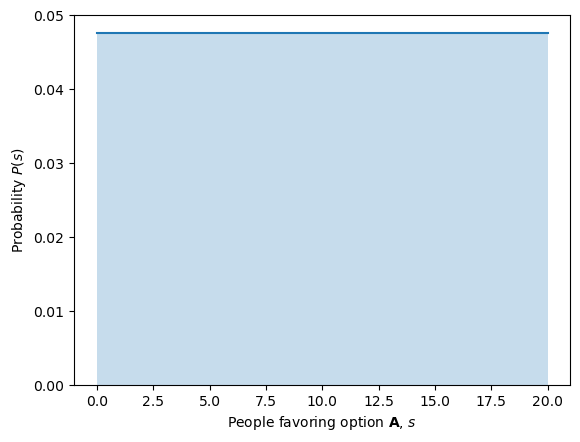

In [15]:
plt.plot(ss,ps0,drawstyle='steps-mid')
plt.fill_between(ss,0,ps0,step='mid',alpha=0.25)
plt.xlabel(r'People favoring option $\mathbf{A}$, $s$')
plt.ylabel('Probability $P(s)$')
plt.ylim(0,)
plt.show()

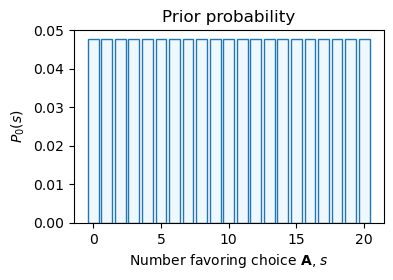

In [16]:
plt.figure(figsize=(4,2.5))
plt.bar(ss,ps0,facecolor="#0080ff10",edgecolor='C0')
plt.xlabel(r'Number favoring choice $\mathbf{A}$, $s$')
plt.ylabel('$P_0(s)$')
plt.ylim(0,)
plt.title('Prior probability')
plt.show()

Below we use:
* `pas[s]`: The probability of getting answer 𝐀 when the number favoring 𝐀 is $s$
* `pbs[s]`: The probability of getting answer 𝚩 when the number favoring 𝐀 is $s$

for the conditional probabilities.

In [17]:
pas = ss/population
pbs = 1-pas

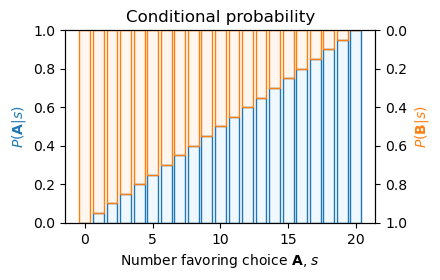

In [18]:
f,a = plt.subplots(figsize=(4,2.5))
a.bar(ss,pas,facecolor="#0080ff10",edgecolor='C0')
a.set_xticks([0,5,10,15,20])
a.set_xlabel(r'Number favoring choice $\mathbf{A}$, $s$')
a.set_ylabel(r'$P(\mathbf{A}|s)$',color='C0')
a.set_ylim(0,1)
b = a.twinx()
b.bar(ss,pbs,facecolor="#ff800010",edgecolor='C1')
b.set_ylim(1,0)
b.set_ylabel(r'$P(\mathbf{B}|s)$',color='C1')
plt.title('Conditional probability')
plt.show()

In [19]:
ps1 = ps0*pbs          # Poll gets 'B'
ps1 /= ps1.sum()       # Normalize

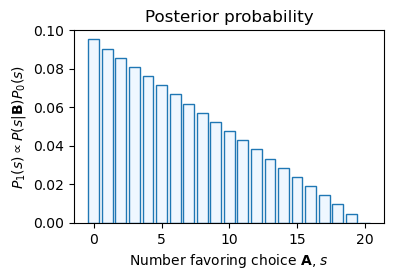

In [20]:
plt.figure(figsize=(4,2.5))
plt.bar(ss,ps1,facecolor="#0080ff10",edgecolor='C0')
plt.xticks([0,5,10,15,20])
plt.xlabel(r'Number favoring choice $\mathbf{A}$, $s$')
plt.ylabel(r'$P_1(s)\propto P(s|\mathbf{B})P_0(s)$')
plt.ylim(0,)
plt.title('Posterior probability')
plt.show()

Consider a population of size $N=20$. Since $P_0(s)$ is constant, we have
\begin{equation} P_1(s) = P(s|\mathbf{B}) = C (20-s) \end{equation}
where $C$ is a normalization constant making the sum of probability $1$. Thus, we have
\begin{equation} C^{-1} = \sum_{s=0}^{20} (20-s) = 420-\frac{20(20+1)}{2} = 210 \end{equation}

The mean value of $s$ is given by the weighted average
\begin{align}
\langle s\rangle & = \sum_{s=0}^{20} s P_1(s) = \frac{1}{210}\left(20\sum_{s=0}^{20} s-\sum_{s=0}^{20}s^2\right) \\
& = \frac{1}{210}\left(20\frac{20(20+1)}{2}-\frac{20(20+1)(2\times 20+1)}{6}\right) \\
& = \frac{1}{210}(4200-2870)=\frac{1330}{210}=\frac{19}{3}.
\end{align}
This is the average number of people favoring option 𝚨.

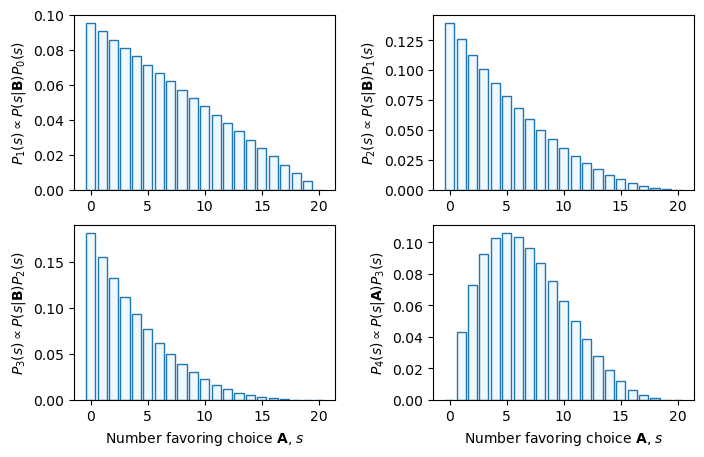

In [21]:
seq = ['B','B','B','A']
ps = ps0.copy()
f,aa = plt.subplots(2,2,figsize=(8,5))
f.subplots_adjust(wspace=0.375)
for (i,r),a in zip(enumerate(seq,start=1),aa.flatten()):
    ps *= pas if r=='A' else pbs
    ps /= ps.sum()
    a.bar(ss,ps,facecolor="#0080ff10",edgecolor='C0')
    if i>2: a.set_xlabel(r'Number favoring choice $\mathbf{A}$, $s$')
    a.set_ylabel(fr'$P_{i}(s)\propto P(s|\mathbf{{{r}}})P_{i-1}(s)$')
    a.set_ylim(0,)
plt.show()

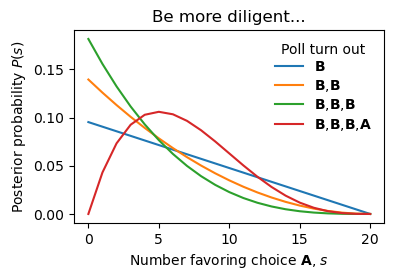

In [22]:
plt.figure(figsize=(4,2.5))
ps = ps0.copy()
for i,r in enumerate(seq,start=1):
    ps *= pas if r=='A' else pbs
    ps /= ps.sum()
    plt.plot(ps,label=','.join(map(lambda r:r'$\mathbf{'+r+'}$',seq[:i])),lw=1.5)
plt.xlabel(r'Number favoring choice $\mathbf{A}$, $s$')
plt.ylabel('Posterior probability $P(s)$')
plt.legend(title='Poll turn out',frameon=False,labelspacing=.25)
plt.title('Be more diligent...')
plt.show()

# Mutual information of a two-state system

In [23]:
N = 1000 # Density of points to make the plots
pp = np.arange(1,N-1)/N # Skip two ends to avoid problem with `log(0)`.
H = -pp*np.log2(pp)-(1-pp)*np.log2(1-pp) # Entropy of the system, when `pp` is the probability of getting $r_+$.

h = lambda p:-p*np.log2(p) # Weighted outcome entropy
MI = 2-2*(h((1-pp)/2)+h(pp/2)) # Mutual information at $P[r_+]=1/2$, `pp` is the error rate

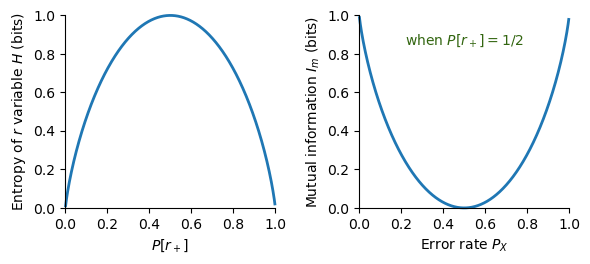

In [24]:
f,aa = plt.subplots(1,2,figsize=(6.5,2.5))
aa[0].plot(pp,H,lw=2,clip_on=False)
aa[0].set_xlim([0,1])
aa[0].set_ylim([0,1])
aa[0].set_xlabel(r'$P[r_+]$')
aa[0].set_ylabel(r'Entropy of $r$ variable $H$ (bits)')
aa[1].plot(pp,MI,lw=2,clip_on=False)
aa[1].set_xlim([0,1])
aa[1].set_ylim([0,1])
aa[1].set_xlabel(r'Error rate $P_X$')
aa[1].set_ylabel(r'Mutual information $I_m$ (bits)')
aa[1].text(0.5,0.85,'when $P[r_+]=1/2$',color='#361',ha='center')
for ax in aa:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.subplots_adjust(wspace=0.4)
plt.show()

<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>